Connected to Python 3.11.0

In [ ]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
prop = pd.read_excel('C:/Users/lehb1/Downloads/Prop_Price.xlsx')
prop.columns = [col.lower() for col in prop.columns]

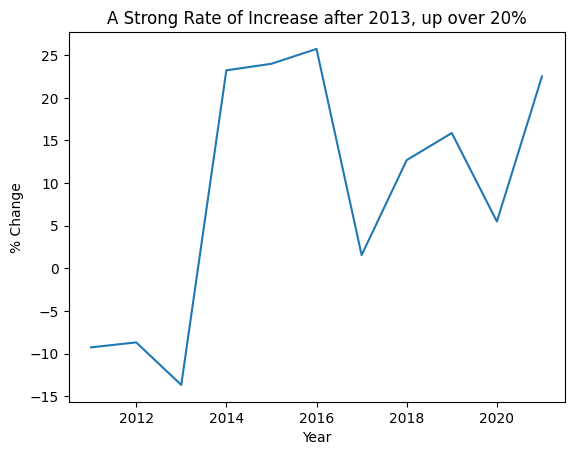

In [ ]:
#analyzing new houses
prop1 = prop[prop['property_desc'] == 'New Dwelling house /Apartment'].reset_index(drop=True)

#converting columns for ease
prop1['sale_date'] = prop1['sale_date'].values.astype('datetime64[D]')

prop1['year'] = prop1['sale_date'].dt.year
prop1['month'] = prop1['sale_date'].dt.month
prop1['day'] = prop1['sale_date'].dt.day

prop1['postal_code'].describe()

#creating a new DF for time series
p1 = pd.DataFrame()
p1.index.name = 'years'
pct_price = prop1['sale_price'].groupby(prop1['year']).mean()
p1 = pd.concat([p1, pct_price], axis=1)
p1 = p1.rename(columns = {'index':'year'})

p1['YoY Increase'] = pct_price.pct_change()*100

y = p1['YoY Increase']
y.plot()
plt.title('A Strong Rate of Increase after 2013, up over 20%')
plt.xlabel('Year')
plt.ylabel('% Change')
plt.show()

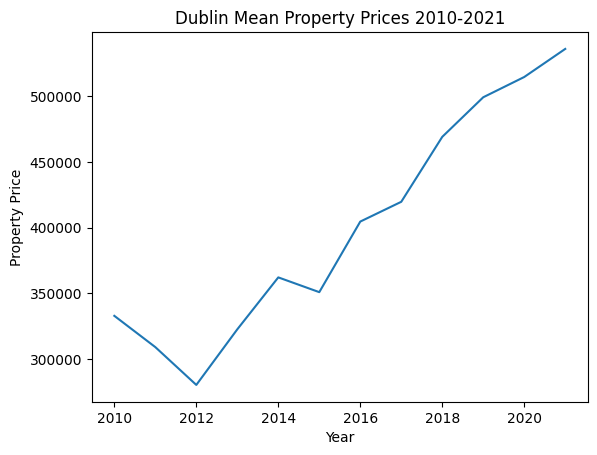

In [ ]:
prop2 = prop.copy()
prop2 = prop2[prop2['county'] == 'Dublin']
p2 = pd.DataFrame()
p2.index.name = 'years'

prop2['year'] = prop2['sale_date'].dt.year
prop2['month'] = prop2['sale_date'].dt.month
prop2['day'] = prop2['sale_date'].dt.day

dub_price = prop2['sale_price'].groupby(prop2['year']).mean()
p2 = pd.concat([p2, dub_price], axis=1)
p2 = p2.rename(columns = {'index':'years'})

p2['Mean-Annual-Price'] = dub_price

y1 = p2['Mean-Annual-Price']
y1.plot()
plt.title('Dublin Mean Property Prices 2010-2021')
plt.xlabel('Year')
plt.ylabel('Property Price')
plt.show()

<ipython-input-5-21314c961c6a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


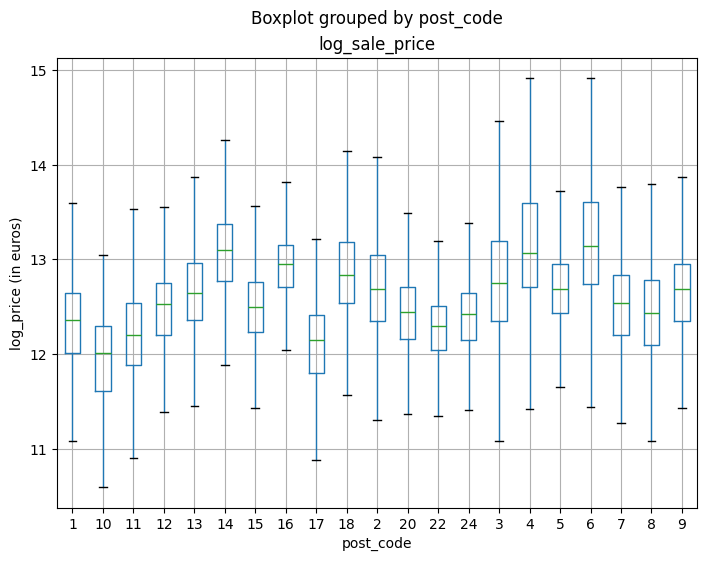

In [ ]:
prop3 = prop.copy()
prop3 = prop[prop['postal_code'].notna()]

prop3.describe(include='all')

#regex expression to extract the post code from postal code
prop3['post_code'] = prop3['postal_code'].str.extract('(\d+)')

prop2['log_sale_price'] = np.log(prop3['sale_price'])


prop3_asc = prop3[prop3['post_code'].notna()]
prop3_asc = prop3.sort_values(by='post_code')
prop3_asc['log_sale_price'] = np.log(prop3['sale_price'])
prop3_asc


prop3_asc.boxplot(column='log_sale_price', by='post_code', figsize=(8,6), showfliers=False)
plt.ylabel('log_price (in euros)')
plt.show()

In [ ]:
prop4 = prop.copy()
#need to explode the desc column

prop4_updated = prop4[prop4['property_size_desc'].notna()]

drops = []

#removing rows reflecting irish language
for index, row in prop4_updated.iterrows():
    check = row['property_size_desc']

    cleaned = check.encode('ascii', 'ignore').decode('ascii')

    if check != cleaned or '?' in check:
        drops.append(index)
if drops:
    prop4_updated = prop4_updated.drop(drops)

#prop3_updated.drop_duplicates(subset=['property_size_desc'])

prop4_encoded = pd.get_dummies(prop4_updated, columns=['property_size_desc'])
prop4_encoded['post_code'] = prop4['postal_code'].str.extract('(\d+)')

y = prop4_encoded['if_market_price']
X = prop4_encoded[['property_size_desc_greater than 125 sq metres', 'property_size_desc_greater than or equal to 125 sq metres', 'property_size_desc_greater than or equal to 38 sq metres and less than 125 sq metres', 'property_size_desc_less than 38 sq metres']]

m1 = sm.OLS(y, X)
results = m1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        if_market_price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     28.03
Date:                Wed, 03 Dec 2025   Prob (F-statistic):           4.22e-18
Time:                        22:12:52   Log-Likelihood:                 20333.
No. Observations:               52789   AIC:                        -4.066e+04
Df Residuals:                   52785   BIC:                        -4.062e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

Connected to Python 3.11.0

In [ ]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm